# Text classification

In [1]:
# import packages

from transformers import pipeline

In [2]:
# provide task 
# this is not a good practice.
# it is better to specify the name of the model.
# otherwise it will take a default model which may change over time.
pipe = pipeline(task = 'text-classification')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
# run pipe
pipe('I like it very much.')

[{'label': 'POSITIVE', 'score': 0.9998759031295776}]

In [4]:
# provide model

pipe = pipeline(task = 'text-classification',
                model = 'nlptown/bert-base-multilingual-uncased-sentiment')


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
# run pipe
pipe('I like it very much')

[{'label': '5 stars', 'score': 0.4895460307598114}]

In [6]:
# consume a list
pipe(['I like it very much',
      'I hate it'])

[{'label': '5 stars', 'score': 0.4895460307598114},
 {'label': '1 star', 'score': 0.7779748439788818}]

# Named Entity Recognition (NER)
is a process for structured and unstructured data. It can classify named entities into some predefined categories.

sample sentence = "Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne on April 1, 1976, in Cupertino, California."

the NER is based on some predefined entities, which might be these ones:

- organization -> "Apple Inc." 
- people -> "Steve Jobs", "Steve Wozniak", "Ronald Wayne"
- date -> "April 1, 1976"
- location -> "Cupertino, California"

In [7]:
# pipeline NER

from transformers import pipeline

In [8]:
pipe = pipeline(task = 'ner')

pipe("Apple Inc. was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne on April 1, 1976, in Cupertino, California.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

[{'entity': 'I-ORG',
  'score': 0.99959284,
  'index': 1,
  'word': 'Apple',
  'start': 0,
  'end': 5},
 {'entity': 'I-ORG',
  'score': 0.9994708,
  'index': 2,
  'word': 'Inc',
  'start': 6,
  'end': 9},
 {'entity': 'I-PER',
  'score': 0.9993297,
  'index': 7,
  'word': 'Steve',
  'start': 26,
  'end': 31},
 {'entity': 'I-PER',
  'score': 0.9993881,
  'index': 8,
  'word': 'Job',
  'start': 32,
  'end': 35},
 {'entity': 'I-PER',
  'score': 0.9853982,
  'index': 9,
  'word': '##s',
  'start': 35,
  'end': 36},
 {'entity': 'I-PER',
  'score': 0.9994411,
  'index': 11,
  'word': 'Steve',
  'start': 38,
  'end': 43},
 {'entity': 'I-PER',
  'score': 0.99933416,
  'index': 12,
  'word': 'W',
  'start': 44,
  'end': 45},
 {'entity': 'I-PER',
  'score': 0.7132423,
  'index': 13,
  'word': '##oz',
  'start': 45,
  'end': 47},
 {'entity': 'I-PER',
  'score': 0.7957286,
  'index': 14,
  'word': '##nia',
  'start': 47,
  'end': 50},
 {'entity': 'I-PER',
  'score': 0.98822355,
  'index': 15,
  'wo

# Question answering
allow us to understand and answer to some questions, also it is possible to extract some relevant informations.

so you have several documents:
- doc1
- doc2
- doc3
- ...
- doc n

you call the pipeline "question answering"

and you can extract information from these documents by asking a certain question.

In [9]:
from transformers import pipeline

In [11]:
pipe = pipeline('question-answering')

pipe(context = 'the Big Apple is a nickname for New York City',
     question = ['What is the Big Apple?', 'which is the nickname of New York?'])

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'score': 0.6673905849456787,
  'start': 17,
  'end': 45,
  'answer': 'a nickname for New York City'},
 {'score': 0.5683131217956543,
  'start': 0,
  'end': 13,
  'answer': 'the Big Apple'}]

# Text Summarization
- distill essential information from source text 
- preserve meaning and key details
- applications
    - document summarization
    - social media post summarization
    - news summarization

so the procedure is:

you give a "source text document" -> pipeline "summarization" -> text summarization

In [12]:
from transformers import pipeline

In [18]:
pipe = pipeline('summarization', model = 'Falconsai/text_summarization')

article = """The company was founded in 2016 by French entrepreneurs Clément Delangue, Julien Chaumond, and Thomas Wolf in New York City, originally as a company that developed a chatbot app targeted at teenagers.[1] The company was named after the "hugging face" emoji.[1] After open sourcing the model behind the chatbot, the company pivoted to focus on being a platform for machine learning.

In March 2021, Hugging Face raised US$40 million in a Series B funding round.[2]

On April 28, 2021, the company launched the BigScience Research Workshop in collaboration with several other research groups to release an open large language model.[3] In 2022, the workshop concluded with the announcement of BLOOM, a multilingual large language model with 176 billion parameters.[4][5]

In December 2022, the company acquired Gradio, an open source library built for developing machine learning applications in Python.[6]

On May 5, 2022, the company announced its Series C funding round led by Coatue and Sequoia.[7] The company received a $2 billion valuation.

On August 3, 2022, the company announced the Private Hub, an enterprise version of its public Hugging Face Hub that supports SaaS or on-premises deployment.[8]

In February 2023, the company announced partnership with Amazon Web Services (AWS) which would allow Hugging Face's products available to AWS customers to use them as the building blocks for their custom applications. The company also said the next generation of BLOOM will be run on Trainium, a proprietary machine learning chip created by AWS.[9][10][11]

In August 2023, the company announced that it raised $235 million in a Series D funding, at a $4.5 billion valuation. The funding was led by Salesforce, and notable participation came from Google, Amazon, Nvidia, AMD, Intel, IBM, and Qualcomm.[12]
"""

In [19]:
pipe(article, min_length = 5 , max_length = 20)

[{'summary_text': 'Hugging Face was founded in 2016 by French entrepreneurs Clément Delangue, Julien Chau'}]

# Translation

translate a text from a source language into one or more target languages.

document in source language -> pipeline "translation" -> document in target language

In [20]:
from transformers import pipeline

In [24]:
pipe = pipeline(task = 'translation', model = 'Helsinki-NLP/opus-mt-en-it')
pipe('The capital of France is Paris')

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/789k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/814k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

/Users/giammarcocellini/opt/anaconda3/envs/nlp/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'La capitale della Francia è Parigi'}]

# Fill-mask
- with fill-mask you can predict some masked/missing word within given sentence. 
- model are able to fill blank with suitable word or token based on context.

so the procedure is:
"masked sentence" -> pipeline "fill-mask" -> "sentence unmasked"

example:

"the capital of France is #### -> pipeline "fill-mask" -> "the capital of France is Paris"

In [25]:
from transformers import pipeline

In [27]:
pipe = pipeline('fill-mask')
pipe('The capital of France is <mask>')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[{'score': 0.15007786452770233,
  'token': 2201,
  'token_str': ' Paris',
  'sequence': 'The capital of France is Paris'},
 {'score': 0.02845068648457527,
  'token': 4612,
  'token_str': ' Barcelona',
  'sequence': 'The capital of France is Barcelona'},
 {'score': 0.021013639867305756,
  'token': 7092,
  'token_str': ' pictured',
  'sequence': 'The capital of France is pictured'},
 {'score': 0.0197868924587965,
  'token': 27356,
  'token_str': ' Beirut',
  'sequence': 'The capital of France is Beirut'},
 {'score': 0.019072962924838066,
  'token': 35767,
  'token_str': ' Napoleon',
  'sequence': 'The capital of France is Napoleon'}]

# Zero - shot classification
during an inference process we have:
- training data X
- pretrained network (on a very large text corpus)
- predictions
the interesting part here is that i'm talking here directly about the inference, not the training.

during inference you pass not only the training data but also some candidate labels Z. based on the candidate labels the predictions are created. So you get the exact same number of predictions as we have provided candidates, and you get the probabilities for each of these candidates.

GOAL:
- apply model to task it was not trained on
- generalize trained model to new and unseen classes
- avoid retraining
- use of additional information like embeddings associated to the classes
- additional information used to make predictions for new classes by relating to known classes
- especially useful if:
    - large number of classes available
    - classes change frequently


different approaches:
- attribute-based
    - classes associated to attributes that describe its character, e.g. animals
    - attributes possible like "has fur", "can fly",...
    - training: model learns to relate attributes to classes
    - inference: able to predict unseen class by combining attributes
- word embeddings
    - classes and instances represented in continuous vector space by word embeddings
    - embeddings capture semantic relationships between words and concepts
    - geometric relationship applied
- transfer learning
    - model trained on large dataset
    - popular technique "natural language inference"
        - hypothesis tested to be true, false, undetermined given a premise
        - you have some candidate classes, some hypotheses, and finally you get some predictions
        - premise: "I watched a documentation and it was amazing"
        - and you want to get one of the different candidates
            - movie
            - book
            - play
        so you want to find out if this text is representing either a movie, a book or a play
        - so implicitly what the model is doing is building some hypothesis
            - "the text is about a movie"
            - "the text is a bout a book"
            - "the text is about a play"
        - then it calculates some predictions based on some softmax activation function



In [28]:
from transformers import pipeline 
import pandas as pd 

In [29]:
task = 'zero-shot-classification'
model = 'facebook/bart-large-mnli'
classifier = pipeline(task=task, model = model)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [30]:
# 3 documents: the starts of 3 different books
#first list's item: Raymond Changler "The Big Sleep" (crime novel)
# second: J.R.R Tolkien "The Lord of the Rings" (fantasy novel)
# third: Bill Bryson "A Short History of Nearly Everything"

documents = ["It was about eleven o’clock in the morning, mid October, with the sun not shining and a look of hard wet rain in the clearness of the foothills. I was wearing my powder-blue suit, with dark blue shirt, tie and display handkerchief, black brogues, black wool socks with dark blue clocks on them. I was neat, clean, shaved and sober, and I didn’t care who knew it. I was everything the well-dressed private detective ought to be. I was calling on four million dollars.",
             "When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.",
             "Welcome. And congratulations. I am delighted that you could make it. Getting here wasn’t easy, I know. In fact, I suspect it was a little tougher than you realize. To begin with, for you to be here now trillions of drifting atoms had somehow to assemble in an intricate and curiously obliging manner to create you. It’s an arrangement so specialized and particular that it has never been tried before and will only exist this once."
             ]


candidate_labels = ['history','crime','fantasy']

In [31]:
res = classifier(documents, candidate_labels = candidate_labels)

<Axes: title={'center': 'Lord of the Rings'}, xlabel='labels'>

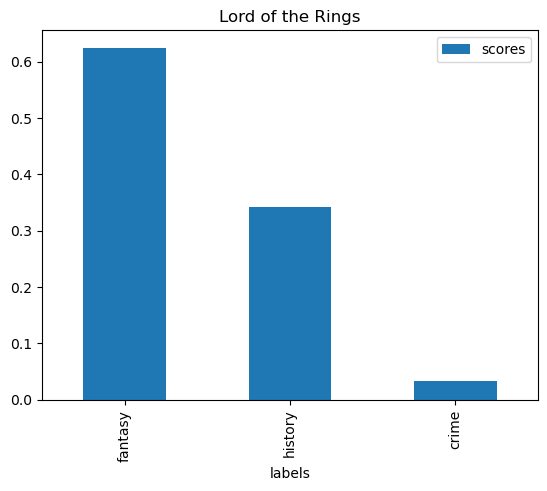

In [32]:
# visualize the results
pd.DataFrame(res[1]).plot.bar(x = 'labels',y = 'scores',title = 'Lord of the Rings')


In [35]:
# flag multiple labels - a document could belong to different classes

classifier(documents[1], candidate_labels = candidate_labels,
           multi_label = True)

{'sequence': 'When Mr. Bilbo Baggins of Bag End announced that he would shortly be celebrating his eleventy-first birthday with a party of special magnificence, there was much talk and excitement in Hobbiton.',
 'labels': ['fantasy', 'history', 'crime'],
 'scores': [0.7727022767066956, 0.15307344496250153, 0.0017908489098772407]}